<a href="https://colab.research.google.com/github/divyakathane/FDIP/blob/main/ASS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3389875951.py:19: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image.ravel(), 256, [0, 256])


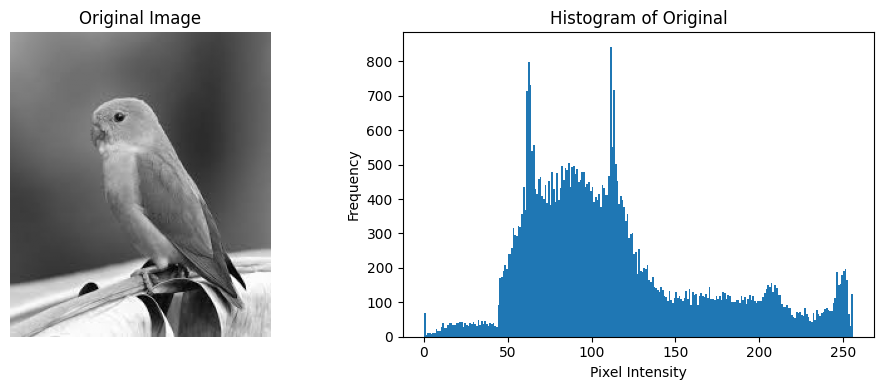

Histogram equalization enhances contrast by redistributing pixel intensities.


/tmp/ipython-input-3389875951.py:40: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized.ravel(), 256, [0, 256])


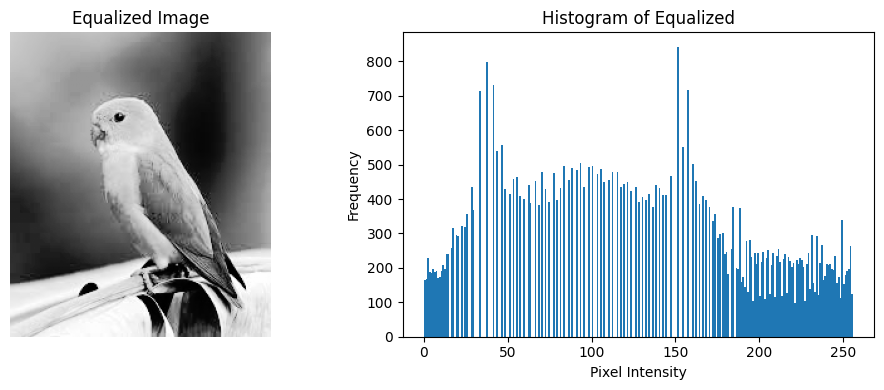

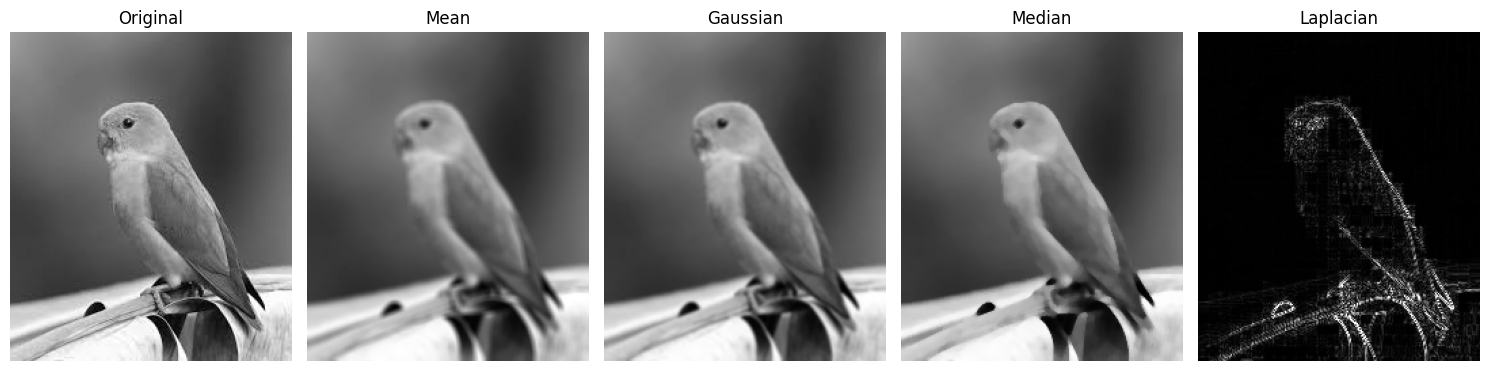

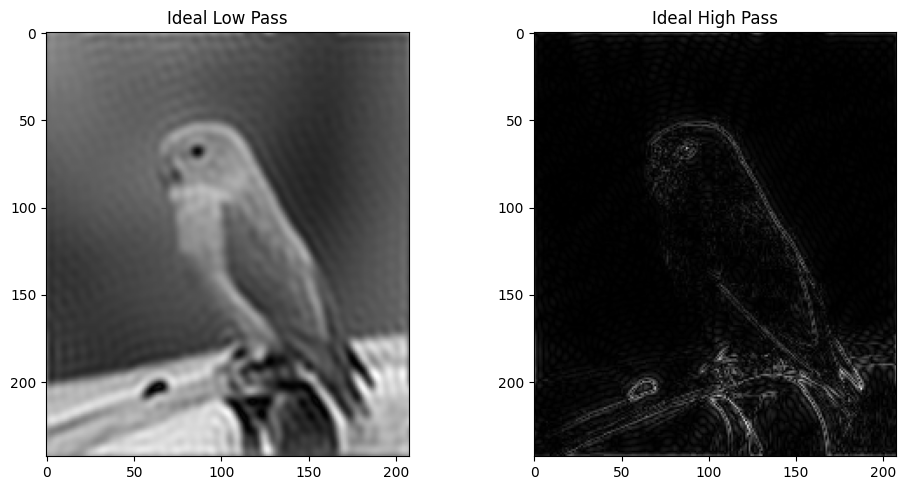

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Read image in grayscale
image = cv2.imread('/content/Unknown.jpeg', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Image not found!")
    exit()

# 2. Plot histogram
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(image.ravel(), 256, [0, 256])
plt.title("Histogram of Original")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 3. Histogram Equalization
equalized = cv2.equalizeHist(image)

# 4. Comment
print("Histogram equalization enhances contrast by redistributing pixel intensities.")

# Show equalized image and histogram
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(equalized, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(equalized.ravel(), 256, [0, 256])
plt.title("Histogram of Equalized")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 5. Spatial Domain Filters

# Mean Filter
mean_filtered = cv2.blur(image, (5, 5))

# Gaussian Filter
gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 0)

# Median Filter
median_filtered = cv2.medianBlur(image, 5)

# Laplacian Filter (Edge Enhancement)
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian_abs = cv2.convertScaleAbs(laplacian)

# Display Spatial Filters
titles = ['Original', 'Mean', 'Gaussian', 'Median', 'Laplacian']
images = [image, mean_filtered, gaussian_filtered, median_filtered, laplacian_abs]

plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# 6. Frequency Domain Filters

def ideal_low_pass(img, cutoff):
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    # Create mask using broadcasting instead of nested loops
    y, x = np.ogrid[:rows, :cols]
    mask = ((y - crow)**2 + (x - ccol)**2) <= cutoff**2

    filtered = dft_shift * mask
    img_back = np.fft.ifft2(np.fft.ifftshift(filtered))
    return np.abs(img_back)

def ideal_high_pass(img, cutoff):
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    # Create mask using broadcasting instead of nested loops
    y, x = np.ogrid[:rows, :cols]
    mask = ((y - crow)**2 + (x - ccol)**2) > cutoff**2

    filtered = dft_shift * mask
    img_back = np.fft.ifft2(np.fft.ifftshift(filtered))
    return np.abs(img_back)

low_pass = ideal_low_pass(image, 30)
high_pass = ideal_high_pass(image, 30)

# Display Frequency Filters
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(low_pass, cmap='gray')
plt.title("Ideal Low Pass")

plt.subplot(1, 2, 2)
plt.imshow(high_pass, cmap='gray')
plt.title("Ideal High Pass")
plt.tight_layout()
plt.show()
